# Takehome_users & Takehome_user_engagement

# Load Data

In [6]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# CSV Files

In [7]:
users = pd.read_csv("takehome_users.csv", encoding = ('ISO-8859-1'))

engagement = pd.read_csv ("takehome_user_engagement.csv")



In [47]:
data = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']

# Data

# Users

In [8]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
users ["creation_time"] = pd.to_datetime(users["creation_time"], format = "%Y-%m-%d %H:%M:%S")
users["last_session_creation_time"] = pd.to_datetime(users["last_session_creation_time"], unit = "s")

In [12]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [13]:
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [14]:
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

# Engagement

In [15]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
print("# of users:" + str(engagement["user_id"].nunique())),print("total logins: " + str(len(engagement)))

# of users:8823
total logins: 207917


(None, None)

In [17]:
engagement ["time_stamp"] = pd.to_datetime ( engagement["time_stamp"], format = "%Y-%m-%d %H:%M:%S" )

In [18]:
engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [ ]:
 def check_3_logins_7_days(dataframe):
    dataframe['date'] = dataframe['time_stamp'].dt.date
    dataframe = dataframe.drop_duplicates(subset='date').sort_values('date')
    passed = dataframe['date'].diff(periods=2)
    return any(passed <= timedelta(days=7))

In [20]:
adopted_bool = engagement.groupby('user_id').apply(check_3_logins_7_days)

adopted_bool.name = "adopted"

print(len(adopted_bool)), print(sum(adopted_bool))

8823
1656


(None, None)

In [119]:
users_w_adopted = users.merge(adopted_bool, left_on='object_id', right_on='user_id')
users_w_adopted = users_w_adopted.set_index('object_id')
users_w_adopted.index_name = 'user_id'
users_w_adopted['adopted'] = users_w_adopted['adopted'].astype(int)
users_w_adopted = users_w_adopted.drop(['invited_by_user_id', 'org_id'], axis=1)



In [120]:
users_w_adopted['creation_time'].max()

Timestamp('2014-05-30 23:59:19')

In [124]:
users_w_adopted = users_w_adopted[users_w_adopted['creation_time'] < '2014-05-16 23:59:19']


In [123]:
users_w_adopted['creation_time'].min()

Timestamp('2012-05-31 00:43:27')

In [25]:
users_w_adopted

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted
object_id,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,0
...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,0


In [27]:
users_w_adopted['act_history'] = users_w_adopted['last_session_creation_time'] - users_w_adopted['creation_time']


In [28]:
users_w_adopted = users_w_adopted[['creation_time', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'act_history', 'adopted']]
users_w_adopted = users_w_adopted.drop(['creation_time', 'last_session_creation_time'], axis=1)
users_w_adopted['act_history'] = users_w_adopted['act_history'].dt.days

In [29]:
users_w_adopted

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,act_history,adopted
object_id,,,,,
1,GUEST_INVITE,1,0,0,0
2,ORG_INVITE,0,0,136,1
3,ORG_INVITE,0,0,0,0
4,GUEST_INVITE,0,0,1,0
5,GUEST_INVITE,0,0,5,0
...,...,...,...,...,...
11996,ORG_INVITE,0,0,0,0
11997,SIGNUP_GOOGLE_AUTH,0,0,5,0
11998,GUEST_INVITE,1,1,0,0


In [30]:
users_w_adopted[users_w_adopted['act_history'] > 0]

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,act_history,adopted
object_id,,,,,
2,ORG_INVITE,0,0,136,1
4,GUEST_INVITE,0,0,1,0
5,GUEST_INVITE,0,0,5,0
6,GUEST_INVITE,0,0,2,0
7,SIGNUP,0,1,4,0
...,...,...,...,...,...
11991,SIGNUP_GOOGLE_AUTH,0,0,40,0
11992,PERSONAL_PROJECTS,0,0,2,0
11995,PERSONAL_PROJECTS,0,0,1,0


In [31]:
source = pd.get_dummies(users_w_adopted['creation_source'])

In [32]:
source

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
11996,0,1,0,0,0
11997,0,0,0,0,1
11998,1,0,0,0,0


In [33]:
df = pd.concat([users_w_adopted, source], axis=1)
df = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH', 'act_history', 'adopted']].drop('creation_source', axis=1)

In [48]:
df

,opted_in_to_mailing_list,enabled_for_marketing_drip,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,act_history,adopted
object_id,,,,,,,,
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,136,1
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...
11996,0,0,1,0,0,0,0,0
11997,0,0,0,0,0,1,5,0
11998,1,1,0,0,0,0,0,0


In [49]:
round(score_unopt_train,4)
num_total = len(df)
num_adopt = len(df[df['adopted'] == 1])
percent = round(num_adopt/num_total * 100,2)
print('Out of ' + str(num_total) + ' users ' + str(num_adopt) + ' are adopted users')
print(str(percent) + '%')

Out of 8822 users 1656 are adopted users
18.77%


<AxesSubplot: xlabel='creation_source', ylabel='count'>

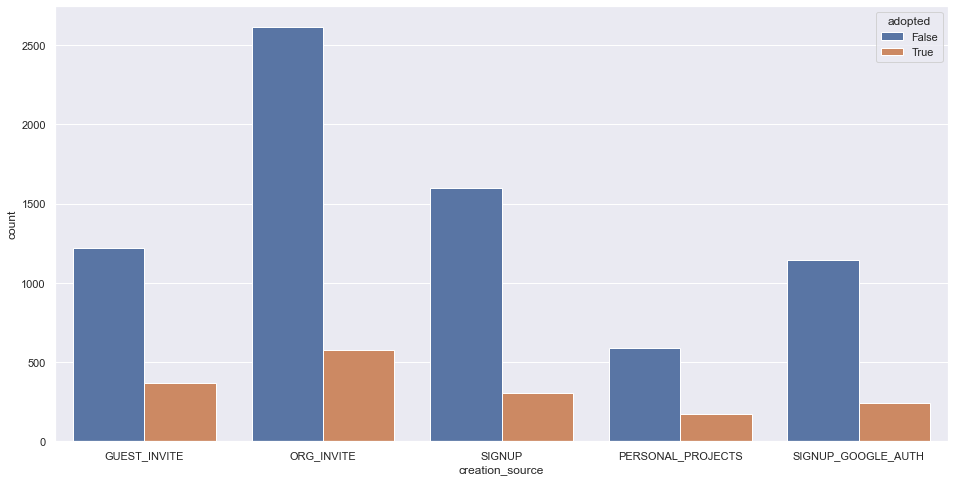

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(x='creation_source', data=users.merge(adopted_bool, left_on='object_id', right_on='user_id'), hue='adopted')

In [36]:
df['opted_in_to_mailing_list'].value_counts()

0    6597
1    2225
Name: opted_in_to_mailing_list, dtype: int64

In [37]:
users_w_adopted.groupby('creation_source')['adopted'].apply(lambda x: sum(x)/len(x))


creation_source
GUEST_INVITE          0.232514
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted, dtype: float64

In [110]:
df['opted_in_to_mailing_list'].value_counts()

0    6597
1    2225
Name: opted_in_to_mailing_list, dtype: int64

In [111]:
users_w_adopted.groupby('creation_source')['adopted'].apply(lambda x: sum(x)/len(x))


creation_source
GUEST_INVITE          0.232514
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted, dtype: float64

<AxesSubplot: >

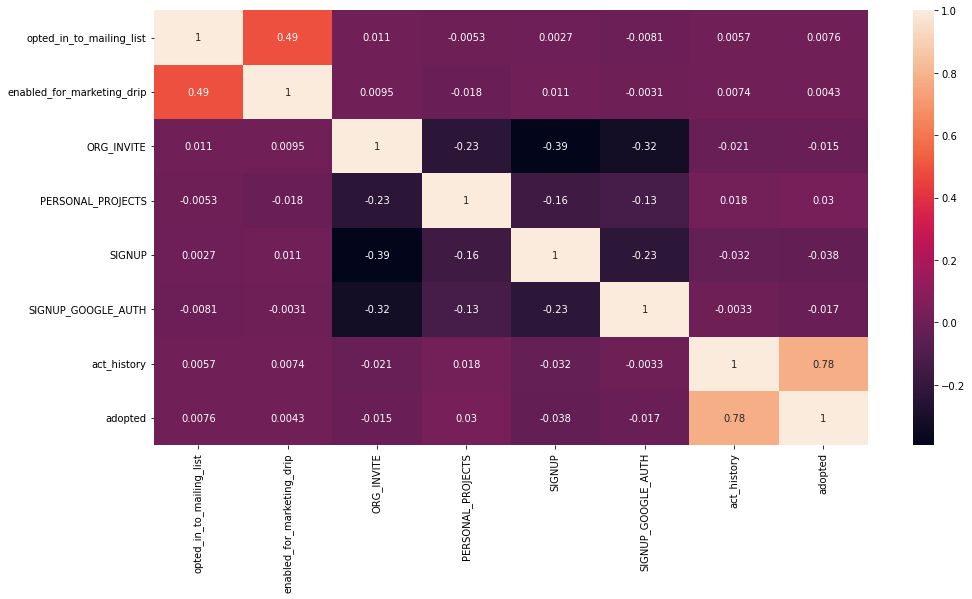

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [57]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV


In [58]:
X = df.drop('adopted', axis=1)
y = df['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6175, 7), (2647, 7), (6175,), (2647,))

In [97]:
RF_params = {
        'n_estimators': [20,80,100,250,155,500],
        'criterion': ['gini', 'entropy']
    }

rf = RandomForestClassifier(random_state=40)
rf_grid_search = GridSearchCV(param_grid=RF_params, estimator=rf, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print(rf_grid_search.best_score_)

0.951255060728745


In [100]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay, confusion_matrix, classification_report, auc, plot_roc_curve

rf_unopt_clf = RandomForestClassifier(random_state=40)
rf_unopt_clf.fit(X_train, y_train)

y_unopt_pred = rf_unopt_clf.predict(X_train)

score_unopt_train = accuracy_score(y_train, y_unopt_pred)

rf_unopt_clf = RandomForestClassifier(random_state=40)
rf_unopt_clf.fit(X_train, y_train)

y_unopt_pred = rf_unopt_clf.predict(X_test)
y_unopt_prob = rf_unopt_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_unopt_prob)
roc_auc = auc(fpr, tpr)


cm_unopt_rf = confusion_matrix(y_test, y_unopt_pred)
score_unopt_test = accuracy_score(y_test, y_unopt_pred)

In [99]:
f_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_train)

score_train = accuracy_score(y_train, y_pred)

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:,1]
cm_rf = confusion_matrix(y_test, y_pred)


score_test = accuracy_score(y_test, y_pred)

importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
importances = importances_no_history.sort_values(ascending=True)

In [98]:
print(classification_report(y_test, y_unopt_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2150
           1       0.87      0.86      0.86       497

    accuracy                           0.95      2647
   macro avg       0.92      0.91      0.92      2647
weighted avg       0.95      0.95      0.95      2647



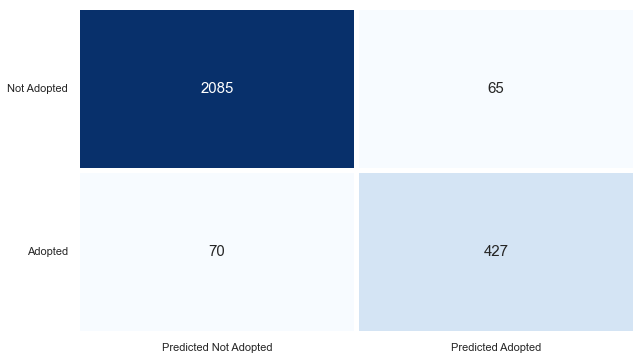

In [125]:
plt.figure(figsize = (10, 6))



sns.heatmap(cm_unopt_rf, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Adopted', 'Adopted'], xticklabels = ['Predicted Not Adopted', 'Predicted Adopted'])




plt.yticks(rotation = 0)



plt.show()




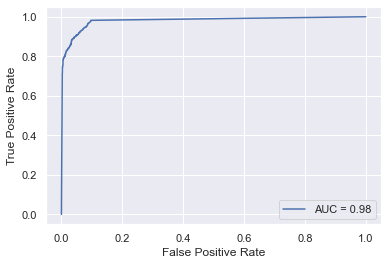

In [65]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [66]:
rf_unopt_clf.feature_importances_

array([0.00318488, 0.00269334, 0.00257127, 0.00185092, 0.00234214,
       0.00214847, 0.98520897])

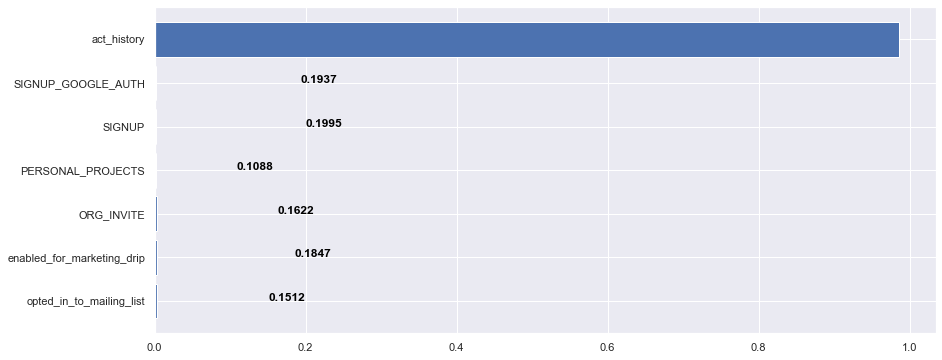

In [96]:
plt.figure(figsize=(14,6))
plt.barh(df.drop(['adopted'], axis=1).columns, rf_unopt_clf.feature_importances_)
for i, v in enumerate(rf_clf.feature_importances_.round(4)):
    plt.text(v, i, str(v), color='black', fontweight='bold')

In [95]:
X_train_no_hist = X_train.drop('act_history', axis=1)
X_test_no_hist = X_test.drop('act_history', axis=1)

In [93]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_no_hist, y_train)

y_pred = rf_clf.predict(X_test_no_hist)
y_prob = rf_clf.predict_proba(X_test_no_hist)[:,1]
cm_rf_no_hist = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
score_test_no_hist = accuracy_score(y_test, y_pred)

importances_no_history = pd.Series(rf_clf.feature_importances_, index=X_train.drop(['act_history'], axis=1).columns)
importances_no_history = importances_no_history.sort_values(ascending=True)
print("The resulting accuracy of the UNOPTIMIZED classifier on the TEST with no act_history set is {}.".format(round(score_test_no_hist,10)))

The resulting accuracy of the UNOPTIMIZED classifier on the TEST with no act_history set is 0.812240272.


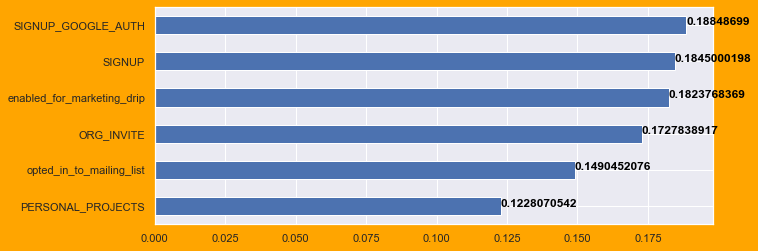

In [92]:
plt.figure(figsize=(10,4), facecolor="orange")


importances_no_history.plot.barh()

#ax = plt.axes()
#ax.set_facecolor("orange")


for i, v in enumerate(importances_no_history.round(10)):
    plt.text(v, i, str(v), color='black', fontweight='bold')